In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("mall customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])

In [7]:
df = df.rename(columns={"Annual Income (k$)" : "Income", "Spending Score (1-100)" : "Score"})

In [8]:
df = df.drop(['CustomerID'], axis=1)

In [9]:
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [10]:
df.isna().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

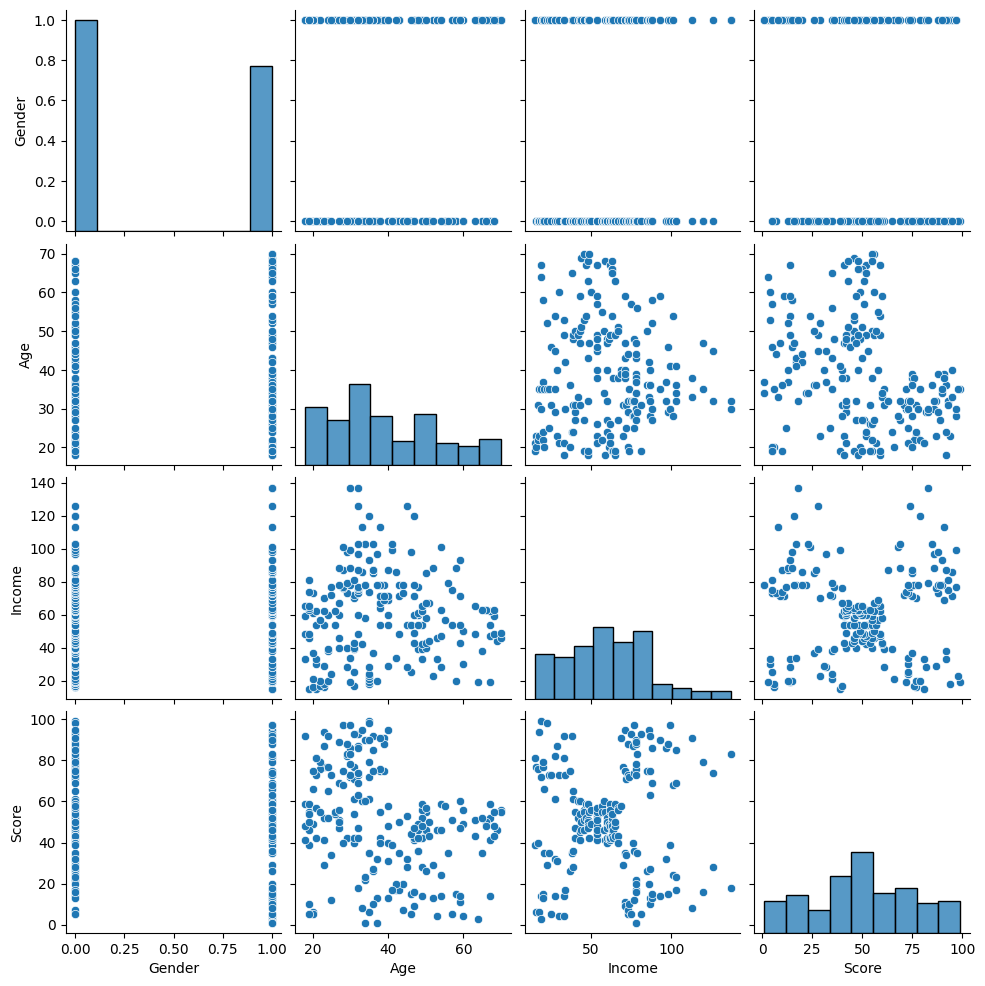

In [11]:
plt.Figure(figsize=(4,4))
sns.pairplot(df)

<Axes: xlabel='Score', ylabel='Income'>

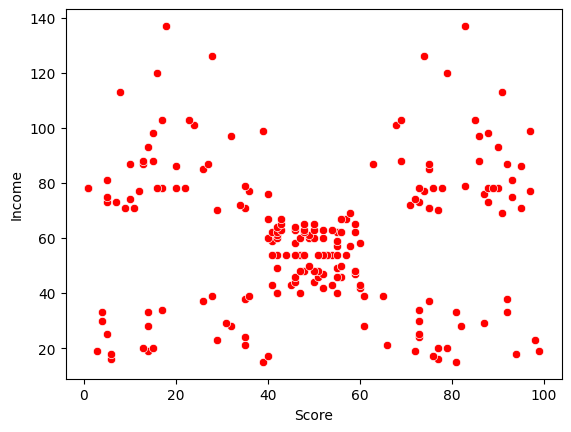

In [12]:
plt.Figure(figsize=(3,4))
sns.scatterplot(x = df.Score, y = df.Income, color = 'r')

In [13]:
df.corr()

,Gender,Age,Income,Score
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Income,0.056410,-0.012398,1.000000,0.009903
Score,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

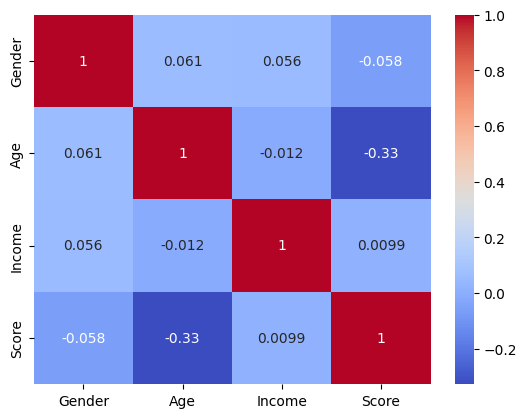

In [14]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<Axes: >

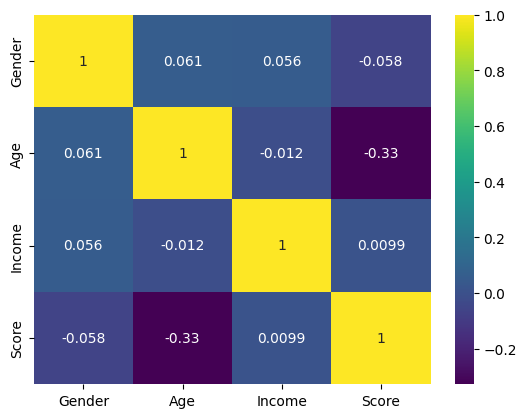

In [15]:
sns.heatmap(df.corr(), annot=True, cmap="viridis")

<Axes: >

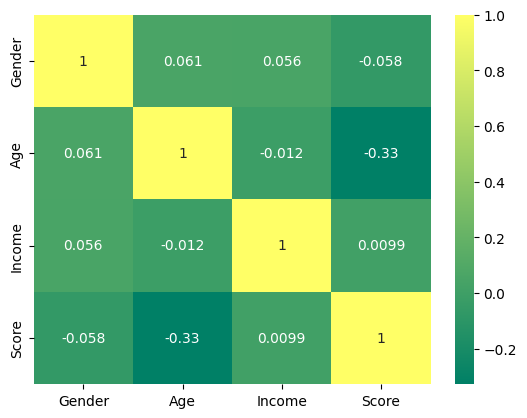

In [16]:
sns.heatmap(df.corr(), annot=True, cmap="summer")

<Axes: >

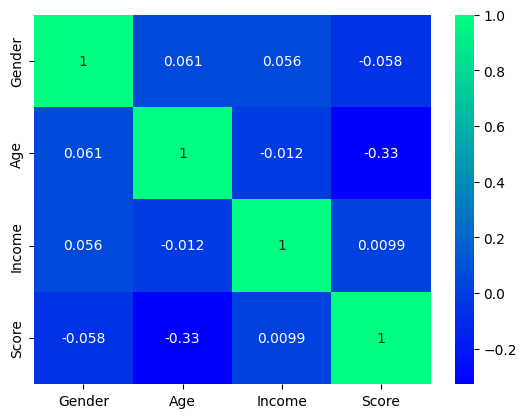

In [17]:
sns.heatmap(df.corr(), annot=True, cmap="winter")

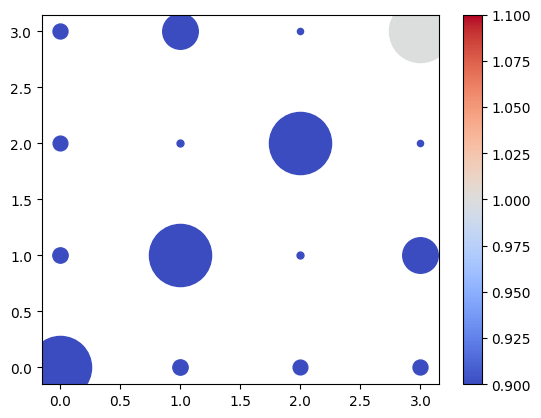

In [18]:
corr = df.corr()

for i in range(len(corr)):
  for j in range(len(corr)):
    plt.scatter(i, j,
                s = abs(corr.iloc[i, j])*2000,
                c = corr.iloc[i, j],
                cmap='coolwarm'
                )

plt.colorbar()
plt.show()

<Axes: xlabel='Income', ylabel='Count'>

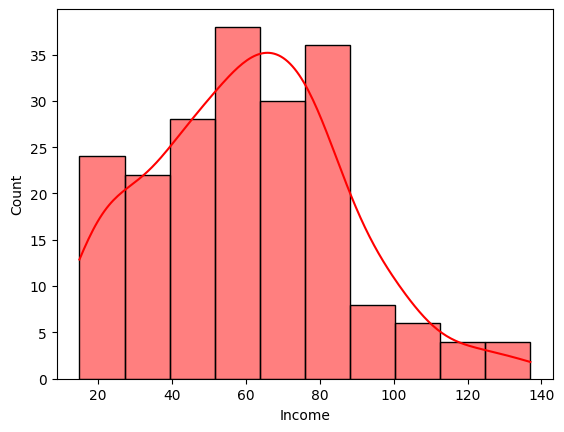

In [19]:
plt.Figure(figsize=(4,3))
sns.histplot(x = df.Income, color='r', kde=True)

<Axes: xlabel='Score', ylabel='Count'>

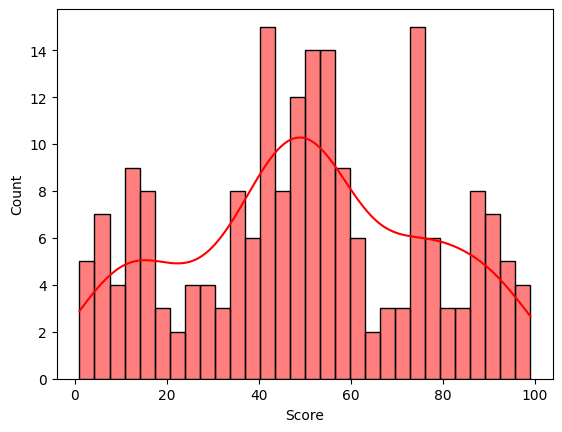

In [20]:
plt.Figure(figsize=(4,3))
sns.histplot(x = df.Score, color='r', kde=True, bins=30)

In [56]:
kmean = KMeans(n_clusters=5)

In [57]:
model = kmean.fit(df[['Income', 'Score']])

In [58]:
model

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [59]:
pred = model.predict(df[['Income', 'Score']])

In [60]:
pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [61]:
df['cluster_pred'] = pred

In [27]:
df.head(10)

,Gender,Age,Income,Score,cluster_pred
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3
5,0,22,17,76,4
6,0,35,18,6,3
7,0,23,18,94,4
8,1,64,19,3,3
9,0,30,19,72,4


In [62]:
cluster_center = model.cluster_centers_

In [63]:
cluster_center

array([[ 48.26      ,  56.48      ],
       [109.7       ,  82.        ],
       [ 87.        ,  18.63157895],
       [ 78.55172414,  82.17241379],
       [ 26.30434783,  20.91304348]])

In [64]:
df0 = df[df['cluster_pred'] == 0]
df1 = df[df['cluster_pred'] == 1]
df2 = df[df['cluster_pred'] == 2]
df3 = df[df['cluster_pred'] == 3]
df4 = df[df['cluster_pred'] == 4]
df5 = df[df['cluster_pred'] == 5]
df6 = df[df['cluster_pred'] == 6]
df7 = df[df['cluster_pred'] == 7]

In [65]:
df0

,Gender,Age,Income,Score,cluster_pred
1,1,21,15,81,0
3,0,23,16,77,0
5,0,22,17,76,0
7,0,23,18,94,0
9,0,30,19,72,0
...,...,...,...,...,...
118,0,51,67,43,0
119,0,50,67,57,0
120,1,27,67,56,0
121,0,38,67,40,0


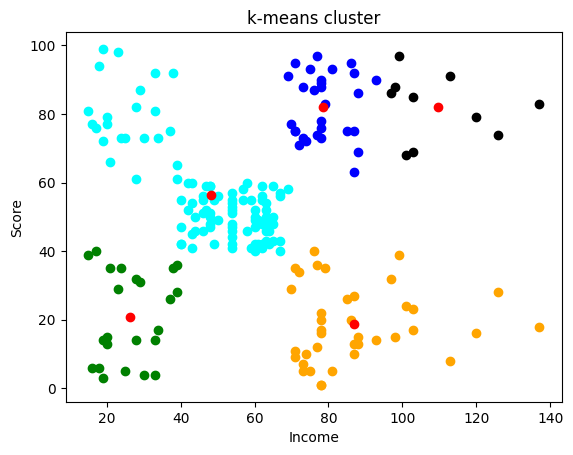

In [78]:
plt.Figure(figsize=(12,8))
plt.scatter(df0.Income, df0.Score, color='cyan')
plt.scatter(df1.Income, df1.Score, color='black')
plt.scatter(df2.Income, df2.Score, color='orange')
plt.scatter(df3.Income, df3.Score, color='blue')
plt.scatter(df4.Income, df4.Score, color='green')
plt.scatter(df5.Income, df5.Score, color='yellow')
plt.scatter(df6.Income, df6.Score, color='purple')
plt.scatter(df7.Income, df7.Score, color='gray')

plt.scatter(cluster_center[:,0], cluster_center[:, 1], color="red")
plt.title("k-means cluster")
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()

In [67]:
import numpy as np

model.predict(np.array([[28,61]]))


c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [68]:
# elbow method

wcss = []
clus = range(2,15)

for k in clus:
  kmean = KMeans(n_clusters=k)
  kmean.fit(df[['Income', 'Score']])
  wcss.append(kmean.inertia_)


In [69]:
wcss

[181363.595959596,
 153672.267842358,
 73679.78903948836,
 44448.45544793371,
 37558.92202302528,
 31908.369338905773,
 25095.703209997548,
 21829.135638779826,
 21123.21283993784,
 19185.849265269615,
 16344.287787858137,
 15395.93979320596,
 14118.33257020757]

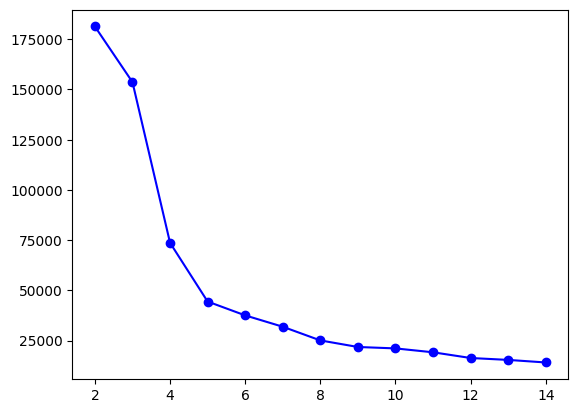

In [70]:
plt.Figure(figsize=(4,3))
plt.plot(clus, wcss, color = 'blue', marker = 'o')

In [ ]:
# pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [71]:
from kneed import KneeLocator
knl = KneeLocator(clus, wcss,curve = "convex" ,direction='decreasing')

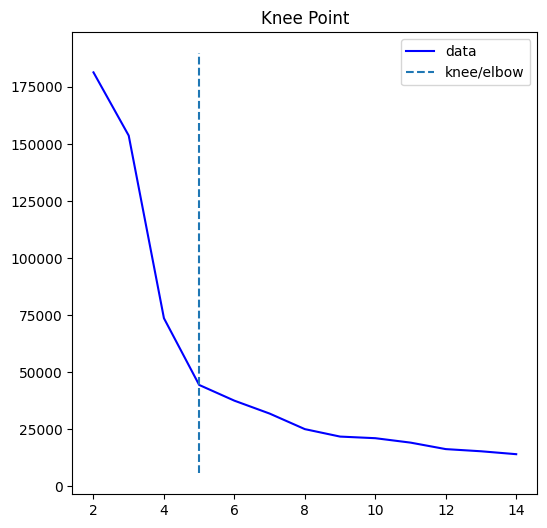

In [72]:
knl.plot_knee()